# SANDBOX BRAN2020 UV

In [1]:
import xarray as xr
import matplotlib

In [2]:
from dask.distributed import Client
client = Client(threads_per_worker=1)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 28
Total threads: 28,Total memory: 125.20 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38823,Workers: 28
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 125.20 GiB
Comm: tcp://127.0.0.1:46445,Total threads: 1
Dashboard: /proxy/44505/status,Memory: 4.47 GiB
Nanny: tcp://127.0.0.1:41789,


In [3]:
bran_u = xr.open_mfdataset('/g/data/gb6/BRAN/BRAN2020/month/ocean_u_mth_20*',parallel=True)
bran_v = xr.open_mfdataset('/g/data/gb6/BRAN/BRAN2020/month/ocean_v_mth_20*',parallel=True)

In [4]:
bran_u

<xarray.Dataset>
Dimensions:         (Time: 276, nv: 2, xu_ocean: 3600, yu_ocean: 1500,
                     st_ocean: 51, st_edges_ocean: 52)
Coordinates:
  * xu_ocean        (xu_ocean) float64 0.1 0.2 0.3 0.4 ... 359.8 359.9 360.0
  * yu_ocean        (yu_ocean) float64 -74.9 -74.8 -74.7 ... 74.8 74.9 75.0
  * st_ocean        (st_ocean) float64 2.5 7.5 12.5 ... 3.603e+03 4.509e+03
  * Time            (Time) datetime64[ns] 2000-01-16T12:00:00 ... 2022-12-16T...
  * nv              (nv) float64 1.0 2.0
  * st_edges_ocean  (st_edges_ocean) float64 0.0 5.0 10.0 ... 4.056e+03 5e+03
Data variables:
    average_DT      (Time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    Time_bounds     (Time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    average_T1      (Time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2      (Time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    u               (Time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 51, 1500, 3600), meta=np.ndarray>
Attributes:
    filename:           TMP/ocean_ofam_2000_01_01.nc.0000
    NumFilesInSet:      20
    grid_type:          regular
    grid_tile:          N/A
    history:            Tue Mar 30 16:16:56 2021: ncap2 -O -s average_DT=aver...
    NCO:                netCDF Operators version 4.9.2 (Homepage = http://nco...
    title:              BRAN2020
    catalogue_doi_url:  http://dx.doi.org/10.25914/6009627c7af03
    acknowledgement:    BRAN is made freely available by CSIRO Bluelink and i...

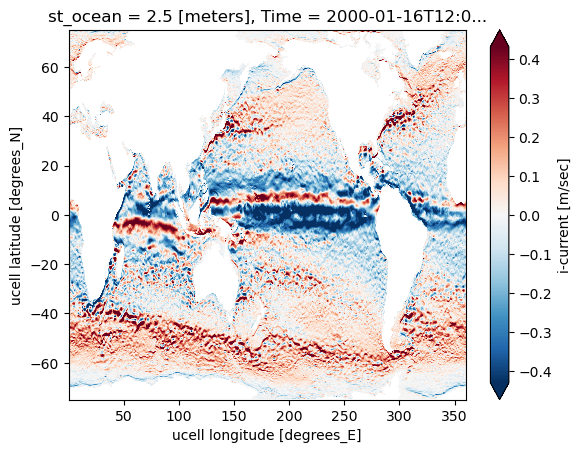

In [6]:
bran_u.u.isel({'Time':0,'st_ocean':0}).plot(robust=True)